# Clase 5: Importa y Entiende la Base

* En este módulo completarás un ejercicio de regresión para pronosticar precios de casas

* Este notebook de Jupyter será tu base de trabajo para seguir las explicaciones del curso.

* En este módulo importarás y analizarás la base de datos "Boston Housing", o casas en Boston

* El objetivo de las clases en este módulo es guiarte a través del proceso de importar, procesar y analizar los datos


## Metodología
* Cuando estés aprendiendo, mi sugerencia es que aún cuando tengas el archivo de apoyo y puedas copiar y pegar las funciones, no lo hagas

* A medida que veas los videos, pausalos a medida que consideres necesario y escribe el código por tu cuenta. Esto te ayuda a acostumbrarte a usar las herramientas de autocompletado y memorizar algunas funciones

* Trata de usar y navegar el notebook usando los atajos del teclado en vez de la interface gráfica en la medida que te sea posible. Aunque en un principio de demorará, en el largo plazo te hará mucho más eficiente en tus desarrollos

* Finalmente, aunque en el video pasemos rápido por algunas funciones, trata de revisar **cualquier** cosa que no entiendas en el código. Por ejemplo, cualquier función nueva que veas, búscala, lee su explicación o documentación, aunque sea para entender a nivel general su intuición

## Importar librerías
* Es común, y además es una buena práctica, empezar los notebooks importando todas las librerías necesarias en la parte superior, contrario a ir importando las librerías a medida que se necesitan: Hace el código más claro y a futuro te ayudará a manejar las dependencias cuando los archivos crecen

* Además de las librerías principales, es común importar algunas funciones útiles específicas, en vez de librerías completas

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

from sklearn import datasets

import seaborn as sns

#%matplotlib inline

## Entiende la estructura de la base

* Scikitlearn trae varias fuentes de datos ya cargadas, aunque las podrías descargar desde fuentes externas
    * ¿Qué otras fuentes de datos trae?
    
* ¿En qué formato viene la base de datos?

In [3]:
# observa la base
datasets.load_boston()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
# guarda la base
boston_data = datasets.load_boston()

In [5]:
# ¿qué componentes tiene la base?
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
# siempre lee la documentación de los datos cuando esta exista
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

* Datos son mantenidos por una prestigiosa universidad
* Tiene referencias académicas
* Su primera publicación fue en 1978!

* Entender tus datos siempre es el primer paso fundamental para cualquier modelo de ML

# Clase 6: Pre-Procesa los Datos

* Lo primero es tener los datos en el formato deseado. En este caso, un "Data Frame" de Pandas es el formato que vamos a trabajar

* Recuerda que los datos tenían por separado los valores de las variables de los nombres

* La documentación de la base indicaba un número de observaciones y de variables. ¿Es ese número consistente con los datos?

In [9]:
# define el dataframe usando los datos y nombres de las columnas
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [10]:
boston_data.keys() # THis just opens up the name of each array container
boston_data.feature_names # This renders the array of feature names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
df # es buena práctica visualizar seguido

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [12]:
# otra forma de ver el número de observaciones
df.shape

(506, 13)

* ¡Nota que tus datos aún no tienen la variable MEDV indicada en la documentación!

* Esta variable es la que nos interesa pronosticar (precio de la casa), por lo tanto debemos incluirla

In [13]:
# nombra la variable objetivo como "MEDV" para mantener la convención
df['MEDV'] = boston_data.target

In [14]:
df # asegúrate que la variable está efectivamente en el DataFrame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## ¿Están bien los nombres de las variables?

* Busca evitar espacios en los nombres, caracteres especiales, etc.
    * Los espacios a veces puedes no verse directo en la interface, puede ser útil imprimir y revisar

* En este caso, los nombres parecen estar bien

* TIP: si no te sientes cómodo con las iniciales o nombres de algunas variables, puedes cambiarlas desde el principio para que te sea más natural usarlas. En este caso, las vamos a mantener igual

## Revisa los valores no reportados ('missing values')

* Es vital entender si hay valores que no estén reportados en la base de datos:
    * Puede ser necesario "imputarlos", o simplemente se descartan, reduciendo la base de datos
    
* La documentación indica el número de valores no reportados. ¡Siempre comprueba!

In [18]:
# los DataFrames tienen funciones muy útiles para examinar toda la base
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
# siempre busca la forma más fácil de asegurarte y visualizar la hipótesis
df.isnull().sum(axis='rows')

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

* En este caso, la documentacion estaba en lo correcto: no hay valores sin reporte

* ¡Esto es demasiado raro en ambientes reales!
    * No te acostumbres a no revisar, o de otra forma, a tomar las cosas como dadas: Para ejercicios y aprendizaje está bien, pero en la práctica tenlo muy en cuenta

## ¿Qué tipos de datos tienes?

* Una distinción que encontrarás importante es entre variables categóricas y variables continuas

* Algunos algoritmos o implementaciones requieren formas específicas de los datos


### Ejemplo de variables categóricas

In [20]:
# crea un dataframe de prueba con variables categóricas y numéricas

# columnas a usar en el dataframe
categorica_test = ["blanca", "roja", "verde"]
continua_test = [1, 2, 3]

# pásalas a formato dataframe
df_test = pd.DataFrame(list(zip(categorica_test, continua_test)),
               columns =['Color', 'Valor'])

df_test

,Color,Valor
0,blanca,1
1,roja,2
2,verde,3


In [21]:
# confirma el tipo de variables
df_test.dtypes

Color    object
Valor     int64
dtype: object

* Cuando requieres pasar los datos a numéricos, es común usar variables "dummy"

In [22]:
# transforma la variable "Color" a variables dummy
df_test = pd.get_dummies(df_test, columns=['Color'])
df_test

,Valor,Color_blanca,Color_roja,Color_verde
0,1,1,0,0
1,2,0,1,0
2,3,0,0,1


In [23]:
df_test.dtypes

Valor           int64
Color_blanca    uint8
Color_roja      uint8
Color_verde     uint8
dtype: object

* Este dataframe no pierde información, pero la presenta de otra forma

### Tipo de variables en los datos de Interés

In [25]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

* En este caso, no necesitas hacer ninguna transformación adicional

# Clase 7: Analiza las variables 1

## Sobre la variable objetivo

* Tener un conocimiento sobre tus variables es indispensable

* Antes de empezar a pensar en modelos predictivos, empieza revisando tus variables principales, en principal tu objetivo

In [16]:
precios = df.MEDV # a veces es útil usar variables intermedias de fácil nombramiento
precios # y siempre es útil visualizar

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [17]:
# Algunas estadísticas básicas

precio_minimo = np.min(precios)
# Alternativa usando Pandas
precio_minimo = precios.min()


precio_maximo = np.max(precios)
# Alternativa usando Pandas
# precio_maximo = precios.max()


precio_promedio = np.mean(precios)
# Alternativa usando Pandas
# precio_promedio = precios.mean()


precio_mediano = np.median(precios)
# Alternativa usando Pandas
# precio_mediano = precios.median()


precio_desvest = np.std(precios)
# Alternativa usando Pandas
# precio_desvest = precios.std(ddof=0)

# Otras estadísticas
cuartil_1 = np.percentile(precios, 25)
cuartil_3 = np.percentile(precios, 75)
cuartil_2 = np.percentile(precios, 50)
inter_cuartil = cuartil_3 - cuartil_1

# Muestra las estadísticas
print ("Estadísticas para el conjunto de datos de Boston-Dataset:\n")
print ("Precio Mínimo: ${:,.2f}".format(precio_minimo))
print ("Precio Máximo: ${:,.2f}".format(precio_maximo))
print ("Precio Promedio: ${:,.2f}".format(precio_promedio))
print ("Precio Mediano: ${:,.2f}".format(precio_mediano))
print ("Desviación Estándar de Precios: ${:,.2f}".format(precio_desvest))
print ("Primer Cuartil de Precios: ${:,.2f}".format(cuartil_1))
print ("Tercer Cuartil de Precios: ${:,.2f}".format(cuartil_3))
print ("Rango Intercuantílico de Precios: ${:,.2f}".format(inter_cuartil))
print("Segundo Cuartil de Precios: ${:,.2f}".format(cuartil_2))

Estadísticas para el conjunto de datos de Boston-Dataset:

Precio Mínimo: $5.00
Precio Máximo: $50.00
Precio Promedio: $22.53
Precio Mediano: $21.20
Desviación Estándar de Precios: $9.19
Primer Cuartil de Precios: $17.02
Tercer Cuartil de Precios: $25.00
Rango Intercuantílico de Precios: $7.98
Segundo Cuartil de Precios: $21.20


* Numpy es una excelente herramienta para cálculos estadísticos
* Muchos de los cálculos los puedes hacer también en Pandas (revísalo con el código alternativo que está comentado)
* Para este ejercicio, y en general para datos pequeños, utiliza la que más se te facilite. Sin embargo, cuando necesites hacer cálculos más complejos, por lo general Numpy es más eficiente y veloz. Esto te servirá más a medida que tu base de datos aumenta
* TIP: es bueno imprimir la información y ser muy claro en lo que está imprimiendo (ejemplo: el formato y unidades). Esto ayuda mucho a tu "yo" del futuro, al igual que si quieres compartir información

* Los precios, a primera intuición, parecen ser muy bajos para estándares de hoy...
    * ... ¡Hasta que recordamos el año al que pertenecen estos datos!
* ¿En qué unidades están los precios? En la descripción, nos indica que están en miles de dólares

* Otra forma de revisar rápidamente tus datos es gráficamente. Cuando tienes una variables continua, un histograma es una excelente herramienta para visualizarla

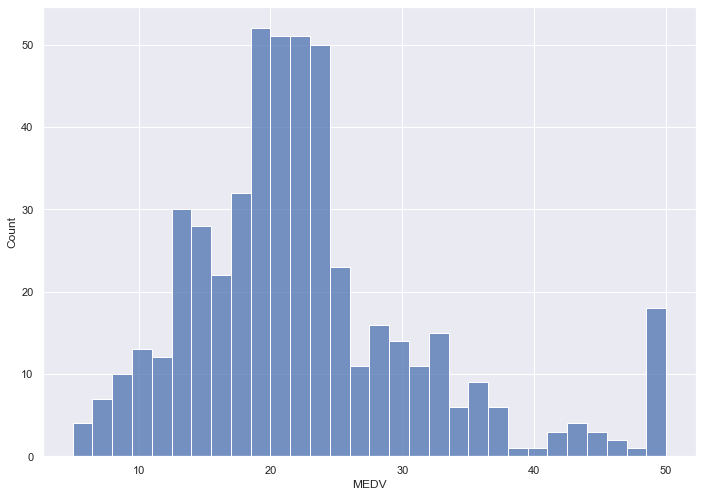

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(df['MEDV'], bins=30)
plt.show()

* Siempre es importante revisar que tus datos y visualizaciones sean consistentes entre sí. ¿El promedio y estadísticas que hiciste anteriormente, son consistentes con esta gráfica?
* ¿Qué información adicional te da la la visualización que no tenías anteriormente?
    * ¡Observa el incremento de número de casas con el precio máximo! Es muy probable que los datos sean "truncados": es decir, que cualquier valor por encima fue asignado a 50 para facilitar el análisis

# ¿Cuál es tu intuición?

* Revisa ahora el significado de las variables explicativas. Recuerda que el problema principal es lograr pronosticar precios usando variables asociadas
* Revisa nuevamente la descripción de las variables. Intuitivamente, ¿Crees que todas podrían afectar el nivel de precios de una casa? ¿Cuáles más que otras?

In [19]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

* Una mayor tasa de crimen en el pueblo correspondiente (CRIM), ¿aumentaría o disminuiría el precio de las casas?

* Una mayor tasa de maestros por niños (PTRATIO), ¿creerías que aumentaría o disiminuiría el precio de las casas?

* Para cada una de las variables, piensa en intuiciones similares. Acá no hay respuestas correctas o incorrectas. Te resultará útil discutir nociones e intuiciones previas para luego revisarlas frente a los datos: esto es muy valioso para comunicar tus resultados

* En la siguiente clase revisarás si tus intuiciones son validadas por los datos o no

# Clase 8: Analiza las variables 2

* En la clase anterior revisaste tus intuiciones. ¿Qué variables tienen una relación positiva con los precios? ¿Cuáles una relación negativa? ¿Cuáles podrían estar más relacionadas

* A continuación verás dos formas de revisar esas intuiciones: gráficamente y a través de una matriz de correlaciones

## Gráficamente

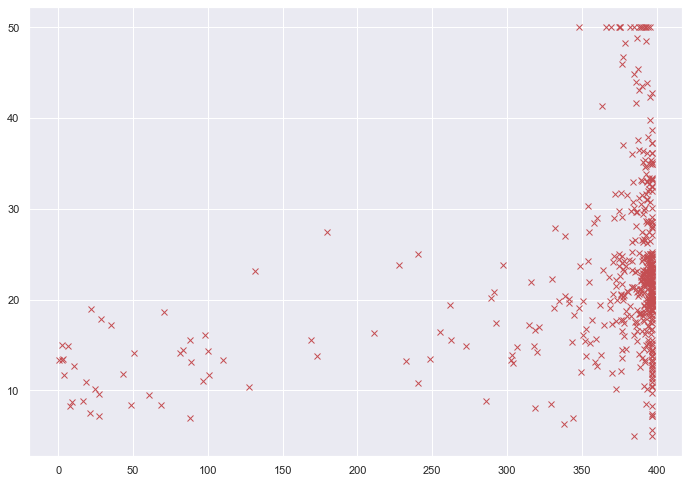

In [24]:
# una forma rápida de ver gráficas de puntos

plt.plot(df.B, df.MEDV, 'rx') # 'o' muestra scatter (por defecto es línea)


* Prueba diferentes variables. En cada una de ellas, es relativamente sencillo ver si la línea sería ascendente o descendente

* Seaborn permite algunas funciones de alto nivel que facilitan las visualizaciones

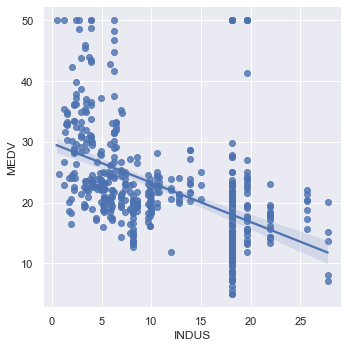

In [34]:
x = "INDUS"
y = "MEDV"

#sns.lmplot(x=x,y=y,data=df,fit_reg=True)
sns.lmplot(x='INDUS', y='MEDV', data= df, fit_reg=True)

# Prueba con diferentes variables. Recuerda df.columns te permite ver cuáles tienes

In [26]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

* Explora ahora varias gráficas al mismo tiempo. Para esto, puedes usar un "for"

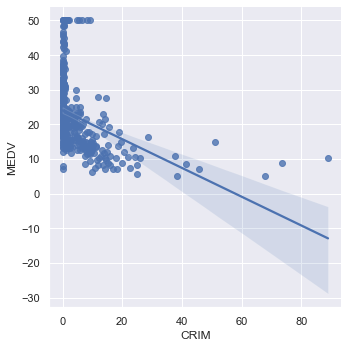

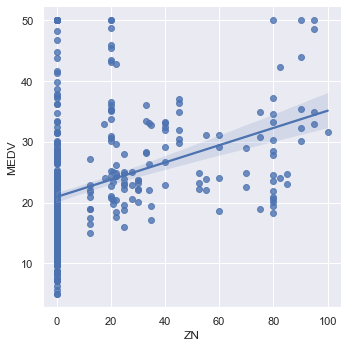

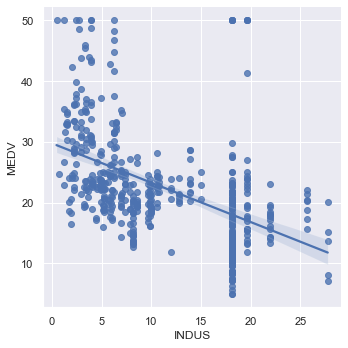

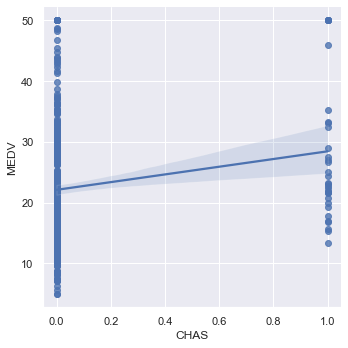

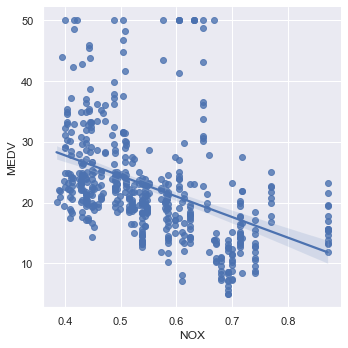

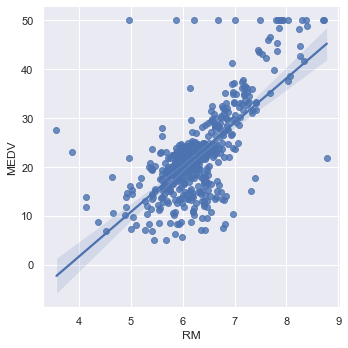

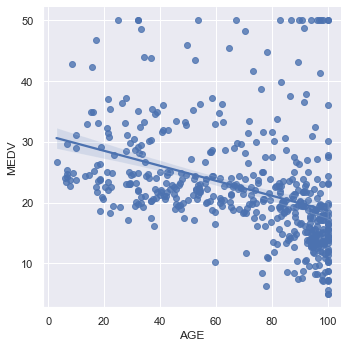

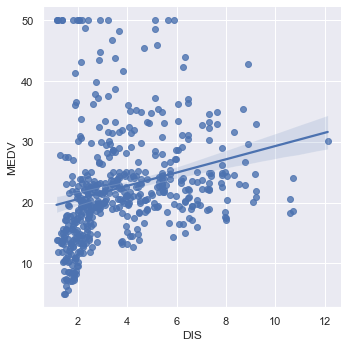

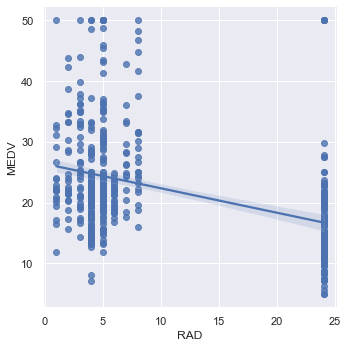

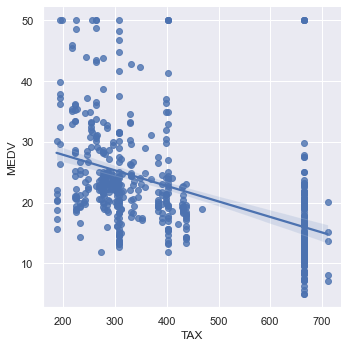

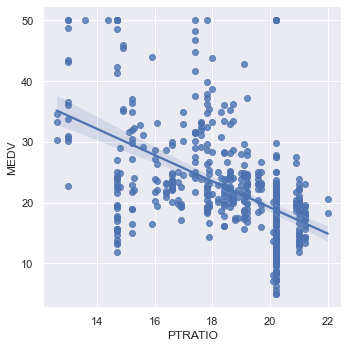

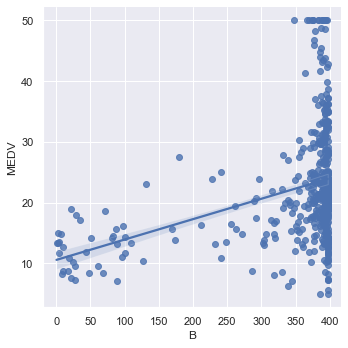

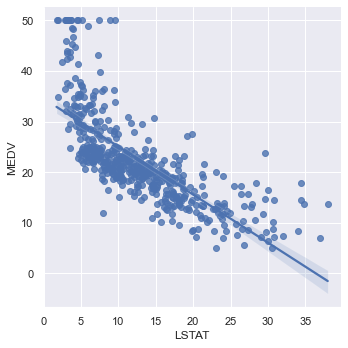

In [36]:
precios = df.MEDV
columnas = ["LSTAT", "RM", "INDUS"]
columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']

for col in columnas:
    sns.lmplot(x=col,y='MEDV',data=df,fit_reg=True)

* LSTAT e INDUS no parecen ser tan lineales, aunque su relación es negativa

* Es muy valioso poder ver varias gráficas al mismo tiempo...

* Pero he encontrado que a veces se puede volver una inundación de información
    * Prueba la gráfica de arriba incluyendo todas las variables. El Notebook lo hace más manejable, pero recuerda que es fácil generar más información de la que necesitas

## Matriz de correlación

* Aunque las gráficas te dan una intuición, es útil tener métricas más específicas sobre cómo varía una variables con respecto a la otra

* Intuitivamente, la correlación es una medida que indica qué tanto dos variables se mueven en la misma dirección
    * Varía entre -1 y 1. 0 indica que las dos variables no tienen relación. 1 implica que las dos variables cambian en la misma dirección de forma perfecta, y -1 que cambian en dirección opuesta de forma perfecta
    
    * Ejemplos: temperatura y helados, edad y estatura, crimen y precios
    
* Recuerda: ¡correlación no implica causalidad! Causalidad es un tema complejo. Para pronosticar, sólo nos interesa que la variable explicativa esté correlacionada.

* La matriz de correlación muestra todas las combinaciones

<AxesSubplot:>

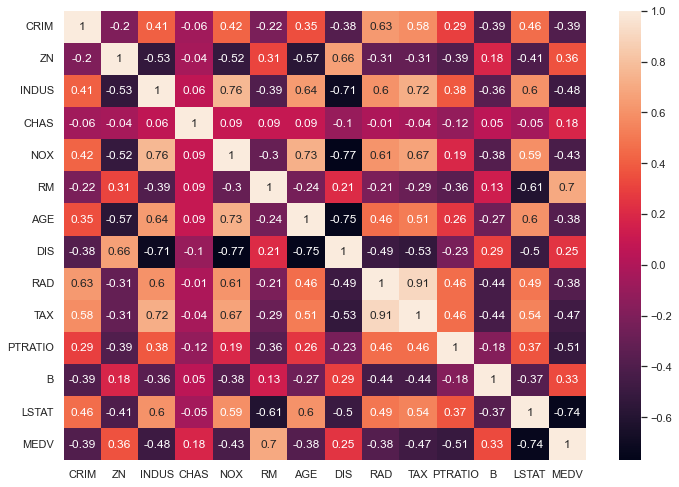

In [43]:
correlation_matrix = df.corr().round(2)

# annot = True para imprimir los valores en cada cuadro
sns.heatmap(data=correlation_matrix, annot=True)
# usa cmap="YlGnBu" para otra paleta de colores

* Revisa la fila (o columna) "MEDV". Esta te muestra cuáles son las variables que tienen una mayor correlación con los precios

* LSTAT, RM, INDUS, TAX tienen una alta correlación. Estas serán nuestras variables explicativas para nuestro primer modelo

* Pero para poder evaluar tu modelo y su poder predictivo, es necesario dividir tus datos. Lo verás en la siguiente clase

# Clase 9: Pronosticando con una variable

* En esta clase aprenderás dos conceptos claves y su implementación: la división de datos en entrenamiento y test, y las métricas para evaluar las predicciones de tu modelo de regresión

* Con estos, realizarás el primer modelo predictivo utilizando una regresión lineal con una única variable


## Primer modelo

## Entrenamiento vs. Test

* Es vital no usar los mismos datos de entrenamiento para medir el modelo. El objetivo de cualquier modelo predictivo es generar pronósticos en datos nuevos, o con los cuales el modelo no fue entrenado

* Una convención común es utilizar X para denotar las variables explicativas, Y para las explicativas

* TIP: nombrar las variables de forma explícita hará tu vida mucho más fácil. Evita variables como "a" o "b". Usa las convenciones y nombres explícitos, aún si eso implica nombres más largos

* Los datos de test se usan para hacer predicciones que el modelo "no ha visto", o que no se pasan para las estimaciones

In [44]:
# renombra las variables para usar las convenciones de X, y
X_rooms = df.RM # única variables explicativa
y_price = df.MEDV # variable a predecir

In [52]:
# como siempre, revisa que haga sentido
X_rooms

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [53]:
# los arreglos de tamaño (n, ) pueden presentar comportamientos inesperados
X_rooms.shape

(506,)

In [57]:
# es mejor usar arreglos tamaño (n, 1)
X_rooms = np.array(X_rooms).reshape(-1,1) # From Series to ndarray
y_price = np.array(y_price).reshape(-1,1) # Reshape your data using array.reshape(-1, 1) if your data has a single feature i.e single column

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


* Scikit learn tiene funciones muy sencillas para segmentar la base de datos

* La segmentación de "train" o entrenamiento se usa para estimar el modelo, la de "test" para realizar el pronóstico y reporte final de métrica desempeño (!qué tan buenas o malas son las predicciones!)

* Nuevamente, X representa variables a usar para predecir, mientras Y las que quieres predecir


In [59]:
# en una sóla línea de código se obtienen los cuatros segmentos
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)

# asegúrate que las dimensiones de los datos son las esperadas
print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


## Métricas para regresión

* RMSE y R2 son las métricas más utilizadas para regresiones

* RMSE tiene en cuenta las diferencias entre valores reales y predicciones para cada observación
    * Calculada con Numpy
    
* R2 explica qué tanto varía la variable objetivo a cause de las explicativas
    * Siempre está entre 0 y 1
    * Calculada con métodos de Scikit Learn

* Para la implementación, es vital pasar como argumentos los datos adecuados. ¡Por eso es tan importante nombrar las variables de forma adecuada!


In [63]:
# instancia el modelo
reg_1 = LinearRegression() # existen muchos otros algoritmos

reg_1.fit(X_train_1, Y_train_1) # estima el modelo siempre con datos de entrenamiento

y_train_predict_1 = reg_1.predict(X_train_1) # genera las predicciones

# RMSE en numpy usa sólo los valores reales y las predicciones
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))

# en scikitlearn se estima en una sóla línea las predicciones
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print("Desempeño del modelo para los datos de entrenamiento")
print("--------------------------------------")
print('RMSE: {:.2f}'.format(rmse))
print('R2: 1>= {} >= 0'.format(r2))
print("\n")

Desempeño del modelo para los datos de entrenamiento
--------------------------------------
RMSE: 6.97
R2: 1>= 0.43 >= 0




In [64]:
# evaluación del modelo para datos de test

y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print("Desempeño del modelo para los datos de test")
print("--------------------------------------")
print("RMSE: {}".format(rmse))
print("R2: {}".format(r2))
print("\n")

Desempeño del modelo para los datos de test
--------------------------------------
RMSE: 4.895963186952216
R2: 0.69




* Observa que hay una diferencia entre la evaluación en entrenamiento y en test. Asegúrate siempre de reportar la de test

* ¿Por qué puede ser menor el desempeño de entrenamiento vs. test?
    * Aunque no profundizaremos en este curso, puede estar indicando que tu modelo es muy sencillo. Y tiene sentido, pues tienes una sóla variable

# Clase 10: Proyecto 

En las clases de este módulo, viste paso a paso desde cómo preparar la base de datos hasta la realización de un modelo sencillo de pronóstico de precios con una sóla variable.

En este proyecto, utilizarás la misma estructura para construir y evaluar un modelo más complejo que utiliza todas las  variables. Deberás replicar el código presentado en las clases y continuar con el presentado abajo.

Sin embargo, no tendrás el código completo. Utilizando lo que aprendiste en las clases anteriores, deberás completar el código siguiendo las indicaciones y comentarios.



Finalmente, deberás contestar las preguntas finales de forma abierta pero concisa. Estas te invitarán a preguntarte e investigar sobre el contexto del tipo de soluciones que podrías encontrar en la industria y sus usos.



In [67]:
# define "X" como todo el conjunto de variables explicativas
# define "y" como la variable a predecir (precios)

X =  df.drop("MEDV",axis=1) # This is to drop the MEDV column and only have matrix X as the training examples without the target
y = df.MEDV

# usa "train_test_split" adicionando los parámetros test_size = 0.2 y random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) # 4 argumentos


# crea una instancia para la regresión lineal
reg_all = LinearRegression()

# usa el método "fit" de la regresión con los datos de entrenamiento (tanto para X como para y)
reg_all.fit(X_train, y_train)

# usa el método "predict" de la regresión para hacer las predicciones sobre el conjunto X de entrenamiento
y_train_predict = reg_all.predict(X_train)

# calcula el rmse
# pasa los parámetros adecuados a "mean_squared_error". Recuerda que esta métrica se calcula
# usando la diferencia entre 
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

# calcula el R cuadrado
r2 = round(reg_all.score(X_train, y_train),2)

print("Desempeño del modelo para los datos de entrenamiento")
print("--------------------------------------")
print('RMSE: {}'.format(rmse))
print('R2: {}'.format(r2))
print("\n")

Desempeño del modelo para los datos de entrenamiento
--------------------------------------
RMSE: 4.6520331848801675
R2: 0.75




In [68]:
# repite el proceso para los datos de test

y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_test, y_test),2)

print("Desempeño del modelo para los datos de test")
print("--------------------------------------")
print("RMSE: {}".format(rmse))
print("R2: {}".format(r2))
print("\n")

Desempeño del modelo para los datos de test
--------------------------------------
RMSE: 4.6520331848801675
R2: 0.67




* Compara frente al modelo guiado durante el módulo que construiste usando una única variable. ¿Cómo cambian los pronósticos en test y entrenamiento?

Text(0.5, 1.0, 'Precios Reales vs. Precios Pronosticados de Casas')

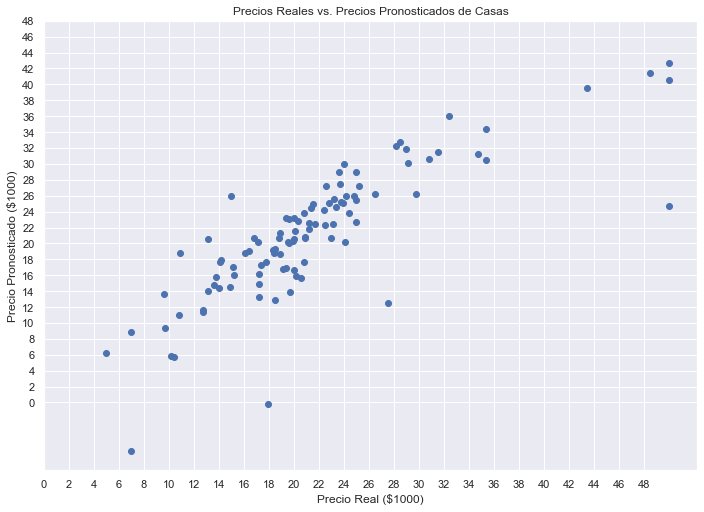

In [70]:
# pasa los precios reales de test y los pronósticos para graficarlos
plt.scatter(y_test, y_pred) # dos argumentos

# estas 5 líneas de código no necesitas modificarlas
plt.xlabel("Precio Real ($1000)")
plt.ylabel("Precio Pronosticado ($1000)")
plt.xticks(range(0, int(max(y_test)),2))
plt.yticks(range(0, int(max(y_test)),2))
plt.title("Precios Reales vs. Precios Pronosticados de Casas")

* ¿Cómo debería ser un pronóstico teórico perfecto en la gráfica anterior?

In [2]:
# Debería ser un gráfico que pase por todos estos puntos.

Otras preguntas:

* Para qué predecir?

* Investiga qué empresas utilizan pronóstico de precios

* Aplicabilidad de este modelo de Boston hoy?

In [ ]:
# Se predice para poder saber cuánto va a costar una nueva casa solamente teniendo en cuenta sus características y así poder tomar mejores decisiones financieras.
# Empresas que utilizan pronóstico de precios: AleaSoft, ENFOR, REALas
# Se podría utilizar este modelo como base para predecir casas en la actualidad, pero se tendría que utilizar una base de datos del año actual (2022) y con los datos de la zona de casas en la cual se quiera utilizar el modelo.